<a href="https://colab.research.google.com/github/mathewfedrick/machine_learning/blob/main/gini_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv("/content/WorldCupPlayers.csv")

In [ ]:
col = list(df.columns)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for m in col:
  df[m]=labelencoder.fit_transform(df[m])
df

RoundID  MatchID  Team Initials  Coach Name  Line-up  Shirt Number  \
0            0      168             25          48        1             0   
1            0      168             46         166        1             0   
2            0      168             25          48        1             0   
3            0      168             46         166        1             0   
4            0      168             25          48        1             0   
...        ...      ...            ...         ...      ...           ...   
37779       88      821              2         264        0            19   
37780       88      821             28         159        0             6   
37781       88      821              2         264        0            20   
37782       88      821             28         159        0            21   
37783       88      821              2         264        0            23   

       Player Name  Position  Event  
0              421         1   1893  
1             5519         1   1893  
2             4893         3    306  
3             3865         3    525  
4             2003         3   1893  
...            ...       ...    ...  
37779          173         3   1893  
37780         4022         3   1893  
37781          103         3   1024  
37782         4831         3   1893  
37783          757         3   1893  

[37784 rows x 9 columns]

In [ ]:
df.head()

RoundID  MatchID  Team Initials  Coach Name  Line-up  Shirt Number  \
0        0      168             25          48        1             0   
1        0      168             46         166        1             0   
2        0      168             25          48        1             0   
3        0      168             46         166        1             0   
4        0      168             25          48        1             0   

   Player Name  Position  Event  
0          421         1   1893  
1         5519         1   1893  
2         4893         3    306  
3         3865         3    525  
4         2003         3   1893

In [ ]:
df.tail()

RoundID  MatchID  Team Initials  Coach Name  Line-up  Shirt Number  \
37779       88      821              2         264        0            19   
37780       88      821             28         159        0             6   
37781       88      821              2         264        0            20   
37782       88      821             28         159        0            21   
37783       88      821              2         264        0            23   

       Player Name  Position  Event  
37779          173         3   1893  
37780         4022         3   1893  
37781          103         3   1024  
37782         4831         3   1893  
37783          757         3   1893

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   RoundID        37784 non-null  int64
 1   MatchID        37784 non-null  int64
 2   Team Initials  37784 non-null  int64
 3   Coach Name     37784 non-null  int64
 4   Line-up        37784 non-null  int64
 5   Shirt Number   37784 non-null  int64
 6   Player Name    37784 non-null  int64
 7   Position       37784 non-null  int64
 8   Event          37784 non-null  int64
dtypes: int64(9)
memory usage: 2.6 MB


In [ ]:
df.shape

(37784, 9)

In [ ]:
df.describe()

RoundID       MatchID  Team Initials    Coach Name       Line-up  \
count  37784.000000  37784.000000   37784.000000  37784.000000  37784.000000   
mean      44.913085    430.426927      36.590488    171.682299      0.496083   
std       32.584787    245.673221      23.838811     98.468716      0.499991   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%       17.000000    219.000000      16.000000     88.000000      0.000000   
50%       29.000000    434.000000      33.000000    173.000000      0.000000   
75%       83.000000    646.000000      55.000000    262.000000      1.000000   
max      100.000000    835.000000      81.000000    334.000000      1.000000   

       Shirt Number   Player Name      Position         Event  
count  37784.000000  37784.000000  37784.000000  37784.000000  
mean      10.726022   3870.034909      2.745818   1682.836545  
std        6.960138   2222.899174      0.747382    432.252008  
min        0.000000      0.000000      0.000000      0.000000  
25%        5.000000   1927.000000      3.000000   1893.000000  
50%       11.000000   3889.000000      3.000000   1893.000000  
75%       17.000000   5821.000000      3.000000   1893.000000  
max       23.000000   7662.000000      3.000000   1893.000000

In [ ]:
df.nunique()

RoundID           101
MatchID           836
Team Initials      82
Coach Name        335
Line-up             2
Shirt Number       24
Player Name      7663
Position            4
Event            1894
dtype: int64

In [ ]:
df.isnull().sum()

RoundID          0
MatchID          0
Team Initials    0
Coach Name       0
Line-up          0
Shirt Number     0
Player Name      0
Position         0
Event            0
dtype: int64

In [ ]:
df.isnull()

RoundID  MatchID  Team Initials  Coach Name  Line-up  Shirt Number  \
0        False    False          False       False    False         False   
1        False    False          False       False    False         False   
2        False    False          False       False    False         False   
3        False    False          False       False    False         False   
4        False    False          False       False    False         False   
...        ...      ...            ...         ...      ...           ...   
37779    False    False          False       False    False         False   
37780    False    False          False       False    False         False   
37781    False    False          False       False    False         False   
37782    False    False          False       False    False         False   
37783    False    False          False       False    False         False   

       Player Name  Position  Event  
0            False     False  False  
1            False     False  False  
2            False     False  False  
3            False     False  False  
4            False     False  False  
...            ...       ...    ...  
37779        False     False  False  
37780        False     False  False  
37781        False     False  False  
37782        False     False  False  
37783        False     False  False  

[37784 rows x 9 columns]

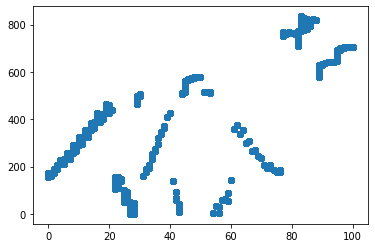

In [ ]:
plt.scatter(df.RoundID	,df.MatchID	)
plt.show()

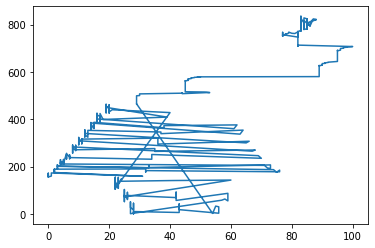

In [ ]:
plt.plot(df.RoundID	,df.MatchID	)
plt.show()

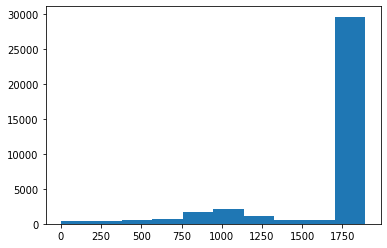

In [ ]:
plt.hist(df.Event)
plt.show()

In [ ]:
x=df.drop('Line-up',axis=1)
y=df['Line-up']

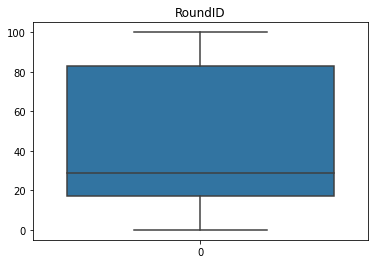

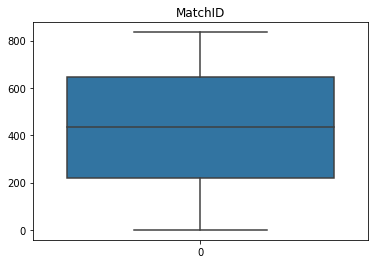

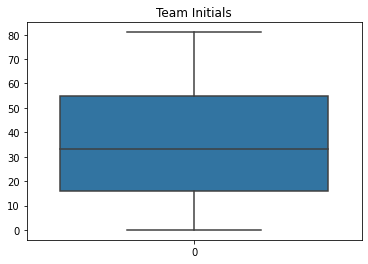

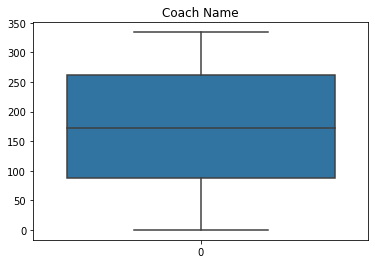

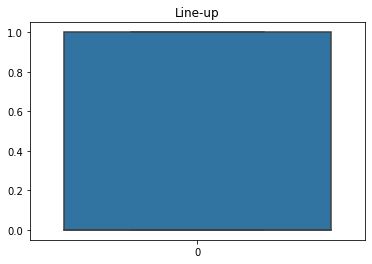

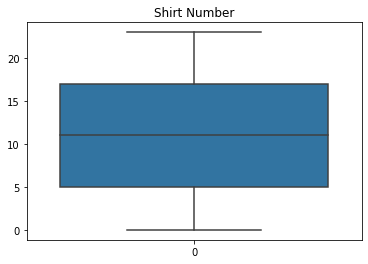

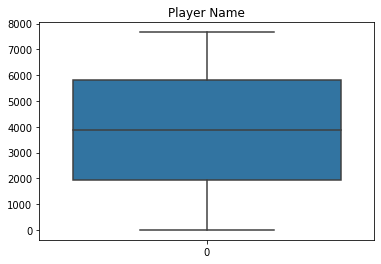

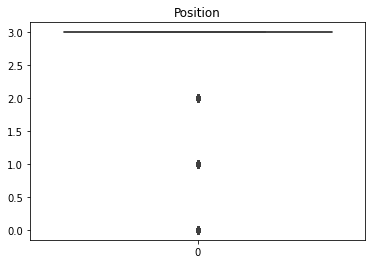

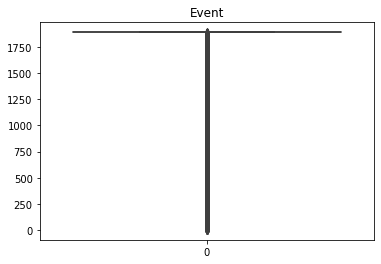

In [ ]:
for j in col:
  sns.boxplot(df[j])
  plt.title(j)
  plt.show()

In [ ]:
x.head(3)

RoundID  MatchID  Team Initials  Coach Name  Shirt Number  Player Name  \
0        0      168             25          48             0          421   
1        0      168             46         166             0         5519   
2        0      168             25          48             0         4893   

   Position  Event  
0         1   1893  
1         1   1893  
2         3    306

In [ ]:
y.head(3)

0    1
1    1
2    1
Name: Line-up, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)


In [ ]:
a=StandardScaler()
x_train=a.fit_transform(x_train)
x_test=a.transform(x_test)

In [ ]:
clf=DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[7647, 1859],
       [1850, 7536]])

In [ ]:
import sklearn

In [ ]:
from sklearn.metrics import accuracy_score
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8036735125979251

In [ ]:
import graphviz

In [ ]:
graphviz.Source(export_graphviz(clf,feature_names=x.columns,filled=True,))